<a href="https://colab.research.google.com/github/vssood/WU_DL/blob/master/Class/WU_DL_WK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Material

## Part 4.1: Encoding a Feature Vector for Keras Deep Learning

In [140]:
file_path = "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv"

In [141]:
import pandas as pd

from scipy.stats import  zscore
import scipy.stats as stats

import matplotlib.pyplot as plt
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

from IPython.display import display


In [142]:
df = pd.read_csv(file_path , na_values=["NA", "?"])

In [143]:
# pd.set_option('display.max_columns',  0)
# pd.set_option('display.max_rows', 5)
display(df)

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,vv,c,51017.0,38.233333,1,5.454545,34,14.013489,41,0.881890,0.744094,0.104838,b
1996,1997,kl,d,26576.0,33.358333,2,3.632069,20,8.380497,38,0.944882,0.877953,0.063851,a
1997,1998,kl,d,28595.0,39.425000,3,7.168218,99,4.626950,36,0.759843,0.744094,0.098703,f
1998,1999,qp,c,67949.0,5.733333,0,8.936292,26,3.281439,46,0.909449,0.598425,0.117803,c


Product column is the predictor - y

remove id 

job & area - convert to one hot vector 

look for missing value

In [144]:
df.describe()

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime
count,2000.000000,1941.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,56924.861927,21.135679,1.199000,9.295306,47.549500,14.316942,45.836500,0.879758,0.563258,0.275939
std,577.494589,10188.938399,12.088238,0.954911,5.731798,58.177598,8.209951,3.703867,0.076570,0.152759,0.182886
min,1.000000,19846.000000,4.000000,0.000000,2.000000,-119.000000,2.160180,29.000000,0.492126,0.000000,0.000000
25%,500.750000,51336.000000,10.608333,1.000000,4.937724,7.000000,7.858578,44.000000,0.838583,0.472441,0.141712
50%,1000.500000,58633.000000,18.083333,1.000000,8.065855,31.000000,12.376985,47.000000,0.889764,0.562992,0.241322
75%,1500.250000,64407.000000,32.925000,2.000000,12.227631,70.000000,19.312772,49.000000,0.933071,0.673228,0.356615
max,2000.000000,88671.000000,42.891667,5.000000,33.009306,384.000000,37.052691,52.000000,1.000000,0.972441,0.977276


In [145]:
df.isnull().sum()

id                 0
job                0
area               0
income            59
aspect             0
subscriptions      0
dist_healthy       0
save_rate          0
dist_unhealthy     0
age                0
pop_dense          0
retail_dense       0
crime              0
product            0
dtype: int64

Convert to one hot vector 

In [146]:
df = pd.get_dummies(df,   columns= ['job', 'area'])

In [147]:
df.head(5)

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d
0,1,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Notice that you don't have to drop the one hot vector conveted column

In [148]:
df.head(2)

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d
0,1,50876.0,13.100,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,60369.0,18.625,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Fill missing values in Income with median value

In [149]:
df['income'] = df['income'].fillna(df['income'].median())

In [150]:
df['income'].median()

58633.0

In [151]:
df.isnull().sum()

id                0
income            0
aspect            0
subscriptions     0
dist_healthy      0
save_rate         0
dist_unhealthy    0
age               0
pop_dense         0
retail_dense      0
crime             0
product           0
job_11            0
job_al            0
job_am            0
job_ax            0
job_bf            0
job_by            0
job_cv            0
job_de            0
job_dz            0
job_e2            0
job_f8            0
job_gj            0
job_gv            0
job_kd            0
job_ke            0
job_kl            0
job_kp            0
job_ks            0
job_kw            0
job_mm            0
job_nb            0
job_nn            0
job_ob            0
job_pe            0
job_po            0
job_pq            0
job_pz            0
job_qp            0
job_qw            0
job_rn            0
job_sa            0
job_vv            0
job_zz            0
area_a            0
area_b            0
area_c            0
area_d            0
dtype: int64

**Generate X and Y for a Classification Neural Network**

In [152]:
# Standadize ranges :

df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

In [153]:
x_columns = df.columns.drop(['id', 'product'])

In [154]:
x_columns

Index(['income', 'aspect', 'subscriptions', 'dist_healthy', 'save_rate',
       'dist_unhealthy', 'age', 'pop_dense', 'retail_dense', 'crime', 'job_11',
       'job_al', 'job_am', 'job_ax', 'job_bf', 'job_by', 'job_cv', 'job_de',
       'job_dz', 'job_e2', 'job_f8', 'job_gj', 'job_gv', 'job_kd', 'job_ke',
       'job_kl', 'job_kp', 'job_ks', 'job_kw', 'job_mm', 'job_nb', 'job_nn',
       'job_ob', 'job_pe', 'job_po', 'job_pq', 'job_pz', 'job_qp', 'job_qw',
       'job_rn', 'job_sa', 'job_vv', 'job_zz', 'area_a', 'area_b', 'area_c',
       'area_d'],
      dtype='object')

In [155]:
# Convert to numpy - Classification
x = df[x_columns].values
y = pd.get_dummies(df['product']).values

In [156]:
products = pd.get_dummies(df['product']).columns

In [157]:
print(x.shape, y.shape, products)

(2000, 47) (2000, 7) Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')


**Multiclass Classification**  - Error Metric

In [158]:
# Classification of Neurl network 

# Split train and test data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1500, 47) (1500, 7) (500, 47) (500, 7)


In [159]:
model = Sequential()




model.add(Dense(100, input_dim = x.shape[1], activation='relu', kernel_initializer= 'random_normal'))    # Hidden 1
model.add(Dense(50, activation='relu', kernel_initializer='random_normal'))                             # Hidden 2
model.add(Dense(25, activation='relu', kernel_initializer='random_normal'))                             # Hidden 3
model.add(Dense(y.shape[1], activation='softmax', kernel_initializer='random_normal'))                           # output

model.compile(loss = 'categorical_crossentropy', 
                    optimizer = tensorflow.keras.optimizers.Adam(),
                    metrics = ['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [160]:
# Fit the model 

model.fit(x_train, y_train, validation_data=(x_test, y_test),
                callbacks = [monitor], verbose = 2, epochs = 500 )

Epoch 1/500
47/47 - 0s - loss: 1.4575 - accuracy: 0.4747 - val_loss: 1.1404 - val_accuracy: 0.4980
Epoch 2/500
47/47 - 0s - loss: 1.1455 - accuracy: 0.4607 - val_loss: 1.1044 - val_accuracy: 0.4980
Epoch 3/500
47/47 - 0s - loss: 1.1114 - accuracy: 0.4853 - val_loss: 1.0598 - val_accuracy: 0.5020
Epoch 4/500
47/47 - 0s - loss: 0.9985 - accuracy: 0.5647 - val_loss: 0.9395 - val_accuracy: 0.6300
Epoch 5/500
47/47 - 0s - loss: 0.8645 - accuracy: 0.6513 - val_loss: 0.8416 - val_accuracy: 0.6860
Epoch 6/500
47/47 - 0s - loss: 0.8154 - accuracy: 0.6687 - val_loss: 0.8430 - val_accuracy: 0.6520
Epoch 7/500
47/47 - 0s - loss: 0.7770 - accuracy: 0.6840 - val_loss: 0.7992 - val_accuracy: 0.6900
Epoch 8/500
47/47 - 0s - loss: 0.7631 - accuracy: 0.6880 - val_loss: 0.8172 - val_accuracy: 0.6520
Epoch 9/500
47/47 - 0s - loss: 0.7325 - accuracy: 0.7013 - val_loss: 0.7760 - val_accuracy: 0.6820
Epoch 10/500
47/47 - 0s - loss: 0.7207 - accuracy: 0.7007 - val_loss: 0.7647 - val_accuracy: 0.7040
Epoch 11/

Calculate accuracy 

In [161]:
pred = model.predict(x_test)
pred

array([[0.  , 0.08, 0.7 , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.74, 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.68, 0.31, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.88, 0.12, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.43, 0.57, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.91, 0.06, ..., 0.02, 0.  , 0.  ]], dtype=float32)

In [162]:
pred = np.argmax(pred, axis=1)

In [163]:
pred[0:5]

array([2, 1, 1, 2, 2])

Find out percentage of accuracy

In [164]:
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [165]:
y_compare = np.argmax(y_test, axis = 1)
score = metrics.accuracy_score(y_compare, pred)
print('Accuracy Score: {}'.format(score))

Accuracy Score: 0.704


**Calculate Classification Log Loss**

Log loss is an error metric that penalizes confidence in wrong answers. Lower log loss values are desired.

In [166]:
# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate Prediction
pred = model.predict(x_test)

print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

Numpy array of predictions


array([[0.    , 0.0821, 0.7045, 0.2125, 0.0009, 0.    , 0.    ],
       [0.    , 0.7433, 0.2541, 0.    , 0.0025, 0.0001, 0.    ],
       [0.    , 0.6816, 0.3138, 0.0003, 0.0042, 0.0001, 0.    ],
       [0.    , 0.2768, 0.7051, 0.0159, 0.0021, 0.    , 0.    ],
       [0.    , 0.0367, 0.5809, 0.3822, 0.0003, 0.    , 0.    ]],
      dtype=float32)

As percent probability
[ 0.0001  8.2081 70.4519 21.2537  0.0853  0.001   0.    ]


In [167]:
score = metrics.log_loss(y_test, pred)
print("Log loss Score {}".format(score))

Log loss Score 0.7416857419013977


In [168]:
# raw probabilities to chosen class (highest probability)
pred = np.argmax(pred, axis =1)
print(pred)

[2 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 1 2 1 2 1 2 1 0 1 0 1 1 1 1 2 1 1 1 2 1 2
 1 2 2 1 2 2 2 2 1 1 2 1 1 1 0 1 2 0 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 1 2 0
 2 1 2 1 2 2 1 2 1 2 1 2 1 2 2 1 1 0 2 2 0 1 1 1 2 3 1 1 1 1 2 1 2 1 1 1 2
 1 2 2 1 1 1 2 2 3 2 2 2 1 1 0 0 1 3 1 1 1 0 1 1 1 2 2 1 1 1 2 1 1 2 1 2 2
 2 1 2 2 0 1 2 2 1 2 1 2 1 1 2 1 2 2 1 3 1 2 2 2 2 2 2 2 1 1 2 2 1 2 2 1 1
 2 1 0 2 0 2 2 2 2 1 2 1 1 2 2 1 1 0 2 2 1 2 1 2 2 1 3 1 0 0 2 2 1 1 1 1 1
 2 0 0 2 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 2 1 2 2 1 2
 2 2 2 2 2 2 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 0 2 1 3 1 1 1 1 1 1 1 2 0 1 1 2
 2 1 1 1 2 1 0 0 1 1 1 1 1 1 1 2 0 2 1 1 1 2 1 1 1 2 2 0 1 2 1 1 2 1 2 2 1
 3 1 2 1 2 2 2 2 0 1 1 1 1 0 3 1 0 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2
 1 1 0 1 1 2 1 2 2 2 0 1 1 1 2 1 2 2 1 2 2 2 1 3 1 1 0 1 1 1 1 2 1 1 1 2 2
 2 1 1 2 2 1 0 1 1 0 2 2 1 1 3 2 2 1 2 1 1 1 1 2 2 2 2 1 1 2 1 1 1 1 1 2 1
 2 1 1 0 2 1 1 2 1 1 1 2 3 1 2 1 1 1 2 1 2 2 2 1 2 2 2 2 2 1 1 1 2 2 1 1 2
 0 2 2 2 1 0 1 1 0 1 2 0 

**Confusion Matrix** 


In [169]:
# plot confusion matrix 

def plot_Confusion_matrix(cm, names, title = 'confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap = cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))

    plt.xticks(tick_marks, names,  rotation = 45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion Matrix, without notmalization
[[ 21   1   0   0   0   0   0]
 [  6 190  53   0   0   0   0]
 [  0  47 135   5   0   0   0]
 [  0   0   8   6   0   0   0]
 [  0   8   0   0   0   0   0]
 [ 10   7   0   0   0   0   0]
 [  3   0   0   0   0   0   0]]


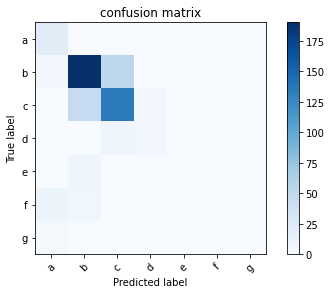

In [170]:
# compute Confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print("Confusion Matrix, without notmalization")
print(cm)

plt.figure()
plot_Confusion_matrix(cm, products)

Normalized confusion matrix
[[0.95 0.05 0.   0.   0.   0.   0.  ]
 [0.02 0.76 0.21 0.   0.   0.   0.  ]
 [0.   0.25 0.72 0.03 0.   0.   0.  ]
 [0.   0.   0.57 0.43 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.59 0.41 0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]]


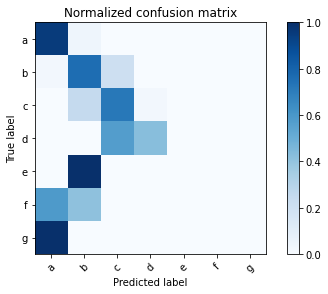

In [171]:
# Normalize the confustion matrix by row (i.e. by the number of samples in each class)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_Confusion_matrix(cm_normalized, products, 
        title='Normalized confusion matrix')

plt.show()

In [172]:
cm.sum(axis=1), np.newaxis

(array([ 22, 249, 187,  14,   8,  17,   3]), None)

## Binary Classification 

In [173]:
file_bc = "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv"

In [174]:
df_bc = pd.read_csv(file_bc, na_values=["NA", "?"])

In [175]:
df_bc.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [176]:
df_bc.isnull().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
se_radius                  0
se_texture                 0
se_perimeter               0
se_area                    0
se_smoothness              0
se_compactness             0
se_concavity               0
se_concave_points          0
se_symmetry                0
se_fractal_dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

Sensitivity Vs Specificity 

Type 1 Vs Type2

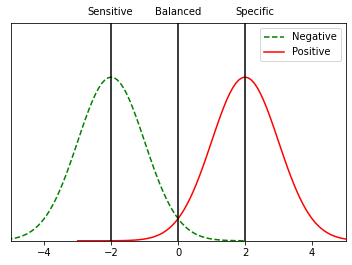

In [177]:
mu1 = -2
mu2 = 2
variance = 1
sigma = math.sqrt(variance)

x1 = np.linspace( mu1 - 5*sigma, mu1 + 4*sigma, 100 )
x2 = np.linspace( mu2 - 5*sigma, mu2 + 4*sigma, 100 )

plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/ 1, color = 'green', linestyle = 'dashed')
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/ 1, color = 'red')

plt.axvline(x = -2, color ="black")
plt.axvline(x = 2, color ="black")
plt.axvline(x = 0, color ="black")

plt.text(-2.7,0.55,"Sensitive")
plt.text(-0.7,0.55,"Balanced")
plt.text(1.7,0.55,"Specific")

plt.ylim([0,0.53])
plt.xlim([-5,5])

plt.legend(['Negative','Positive'])
plt.yticks([])
plt.show()

Apply zscore for all x columns 

In [178]:
x_columns = df_bc.columns.drop(['diagnosis', 'id'])
# convert all columns to zscore 
for col in x_columns:
    df_bc[col] = zscore(df_bc[col])

In [179]:
# convert to np array
xbc = df_bc[x_columns].values
# Binary classification - 1 for malignat 
ybc = df_bc['diagnosis'].map({'M':1, "B":0}).values

In [180]:
# Plot an ROC. pred - the predictions, y - the expected output.

def plot_roc(pred, y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False poistive rate')
    plt.ylabel('True postitive rate')
    plt.title('Receiver Operating Characteristics (ROC)')
    plt.legend(loc= 'lower right')
    plt.show()

**ROC Chart Example**

In [181]:
# split the data between train and test
xbc_train, xbc_test, ybc_train,  ybc_test = train_test_split(xbc, ybc, test_size = 0.25, random_state = 42) 

print(xbc_train.shape, ybc_train.shape, xbc_test.shape, ybc_test.shape)

(426, 30) (426,) (143, 30) (143,)


In [182]:
# create model

model = Sequential()
model.add(Dense(100, input_dim = xbc.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(25, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
model.compile(loss=  'binary_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adam(),
              metrics = ['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3,
                        patience =5, verbose = 1, mode = 'auto', restore_best_weights = True)


In [183]:
model.fit(xbc_train, ybc_train, validation_data=(xbc_test, ybc_test),
          callbacks = [monitor], verbose = 2, epochs = 1000)

Epoch 1/1000
14/14 - 0s - loss: 0.6693 - accuracy: 0.8169 - val_loss: 0.6273 - val_accuracy: 0.9441
Epoch 2/1000
14/14 - 0s - loss: 0.5780 - accuracy: 0.9272 - val_loss: 0.4860 - val_accuracy: 0.9441
Epoch 3/1000
14/14 - 0s - loss: 0.4210 - accuracy: 0.9296 - val_loss: 0.3070 - val_accuracy: 0.9510
Epoch 4/1000
14/14 - 0s - loss: 0.2588 - accuracy: 0.9460 - val_loss: 0.1749 - val_accuracy: 0.9510
Epoch 5/1000
14/14 - 0s - loss: 0.1602 - accuracy: 0.9648 - val_loss: 0.1093 - val_accuracy: 0.9720
Epoch 6/1000
14/14 - 0s - loss: 0.1168 - accuracy: 0.9718 - val_loss: 0.0793 - val_accuracy: 0.9720
Epoch 7/1000
14/14 - 0s - loss: 0.0945 - accuracy: 0.9789 - val_loss: 0.0688 - val_accuracy: 0.9650
Epoch 8/1000
14/14 - 0s - loss: 0.0817 - accuracy: 0.9789 - val_loss: 0.0610 - val_accuracy: 0.9650
Epoch 9/1000
14/14 - 0s - loss: 0.0737 - accuracy: 0.9789 - val_loss: 0.0578 - val_accuracy: 0.9720
Epoch 10/1000
14/14 - 0s - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0563 - val_accuracy: 0.9720

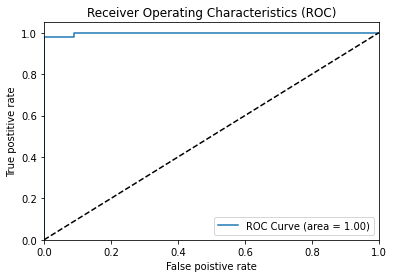

In [184]:

pred = model.predict(xbc_test)
plot_roc(pred,ybc_test)

## Part 4.3: Keras Regression for Deep Neural Networks with RMSE

In [185]:
df = pd.read_csv(file_path, na_values= ['NA', "?"])

Y predictor = Prdict the Age based on the product they bought  

In [186]:
df.head()

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


In [187]:
# Create Dummies 
df= pd.get_dummies(df, columns=['job', 'area', 'product'])

In [188]:
# Update missing income with median income
df['income'] = df['income'].fillna(df['income'].median())

In [189]:
#Standardize ranges
d_columns = ['income', 'aspect', 'subscriptions', 'save_rate' ]

for col in d_columns:
    df[col] = zscore(df[col])

In [192]:
# Convert to numpy - classification
x_columns = df.columns.drop(['age', 'id'])
x = df[x_columns].values
y = df['age'].values

In [193]:
print(x, y)

[[-0.61 -0.66 -0.21 ...  0.    0.    0.  ]
 [ 0.34 -0.21  0.84 ...  0.    0.    0.  ]
 [-0.18  1.13 -0.21 ...  0.    0.    0.  ]
 ...
 [-2.83  1.51  1.89 ...  0.    1.    0.  ]
 [ 1.09 -1.27 -1.26 ...  0.    0.    0.  ]
 [ 0.45 -0.35 -1.26 ...  0.    0.    0.  ]] [49 51 44 ... 36 46 48]


In [194]:
# create train / test
x_train , x_test, y_train, y_test = train_test_split(x, y ,
                            test_size = 0.25, random_state = 42)

In [195]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1500, 53) (500, 53) (1500,) (500,)


In [196]:
# Build the model 
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(10, activation='relu', kernel_initializer= 'random_normal'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor = 'val_loss', min_delta= 1e-3, 
                    patience = 5, verbose =1,
                    mode = 'auto', restore_best_weights = True)

In [197]:
# fit the model
model.fit(x_train, y_train, validation_data= (x_test, y_test),
          callbacks = [monitor], verbose = 2, epochs = 1000)

Epoch 1/1000
47/47 - 0s - loss: 2035.7003 - val_loss: 1873.9703
Epoch 2/1000
47/47 - 0s - loss: 1526.0760 - val_loss: 999.1725
Epoch 3/1000
47/47 - 0s - loss: 548.3021 - val_loss: 262.7303
Epoch 4/1000
47/47 - 0s - loss: 246.9267 - val_loss: 226.6613
Epoch 5/1000
47/47 - 0s - loss: 219.6692 - val_loss: 204.5244
Epoch 6/1000
47/47 - 0s - loss: 197.2735 - val_loss: 183.6048
Epoch 7/1000
47/47 - 0s - loss: 175.4441 - val_loss: 164.0406
Epoch 8/1000
47/47 - 0s - loss: 155.4614 - val_loss: 145.8304
Epoch 9/1000
47/47 - 0s - loss: 136.9540 - val_loss: 128.3982
Epoch 10/1000
47/47 - 0s - loss: 119.5188 - val_loss: 113.3103
Epoch 11/1000
47/47 - 0s - loss: 103.9458 - val_loss: 99.2021
Epoch 12/1000
47/47 - 0s - loss: 90.2605 - val_loss: 87.0331
Epoch 13/1000
47/47 - 0s - loss: 78.7382 - val_loss: 76.5868
Epoch 14/1000
47/47 - 0s - loss: 68.8361 - val_loss: 68.3013
Epoch 15/1000
47/47 - 0s - loss: 60.6972 - val_loss: 61.2106
Epoch 16/1000
47/47 - 0s - loss: 53.7752 - val_loss: 54.5967
Epoch 17/

In [198]:
# Predict Root Mean Square Error 
pred = model.predict(x_test)

# Measure MSE error 
score = metrics.mean_squared_error(pred, y_test)
print("Final Score (MSE): {}".format(score))

Final Score (MSE): 0.6404164519348488


In [199]:
#Root Mean Square Error

score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final Score (RMSE) : {}".format(score))

Final Score (RMSE) : 0.8002602401312018


### **Lift Chart**

Sort the data by expected output. Plot the blue line above.

For every point on the x-axis plot the predicted value for that same data point. This is the green line above.

The x-axis is just 0 to 100% of the dataset. The expected always starts low and ends high.

The y-axis is ranged according to the values predicted.

In [200]:
# Regression Chart 

def chart_regression(pred, y, sort = True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace = True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label = 'prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

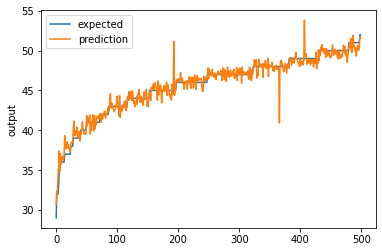

In [201]:
# plot the chart 
chart_regression(pred.flatten(), y_test)